# LEGO Data Analysis - Rebrickable

The dataset is from https://rebrickable.com/downloads/. 

From the Rebrickable website - "The LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database is available for download as csv files here. These files are automatically updated daily. If you need more details, you can use the API which provides real-time data, but has rate limits that prevent bulk downloading of data."

Rebrickable provides this database to be used for any purpose.

## LEGO Data Model

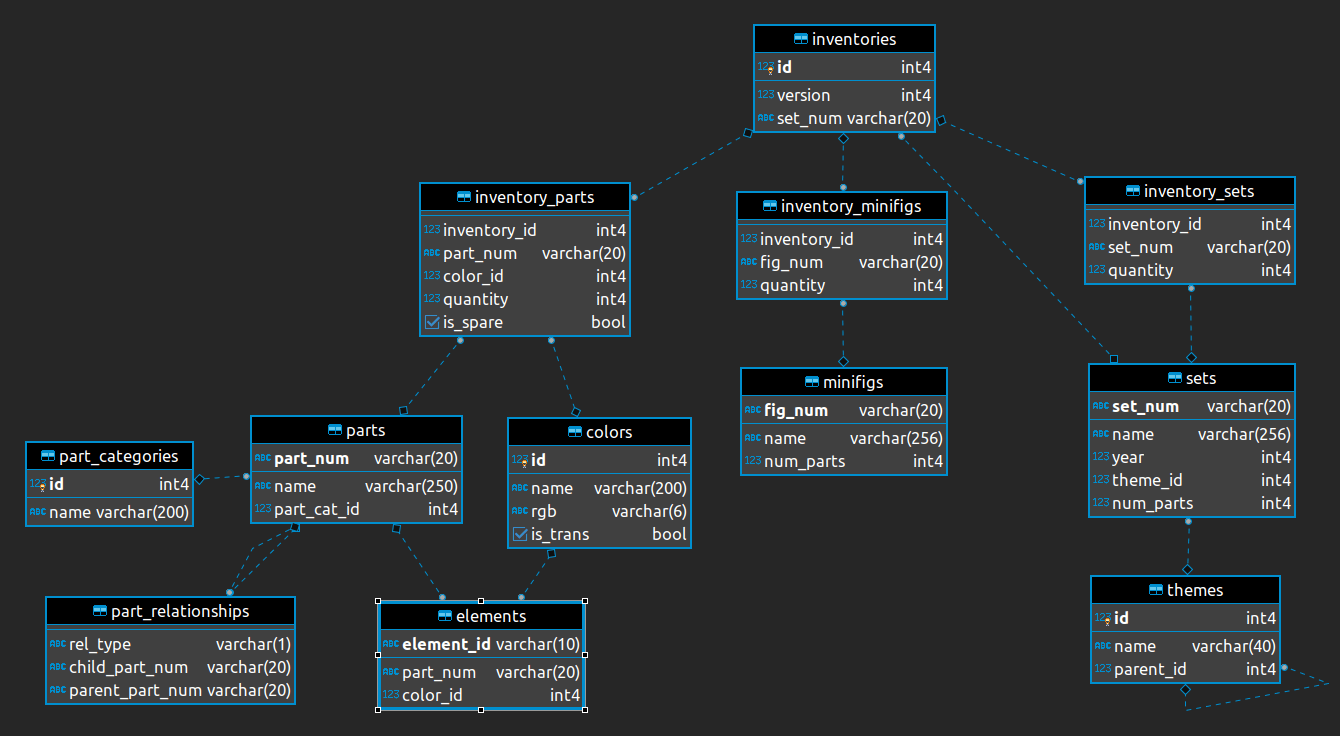

# Answer some Questions
- 1) What is the total number of parts per theme?
- 2) What is the total number of parts per year?
- 3) How many sets where created in each Century in the dataset?
- 4) What percentage of sets ever released in the 21st Century were Trains Themed?
- 5) What percentage of sets ever released in the 21st Century were Disney Themed?
- 6) What is the popular theme by year in terms of sets released in the 21st Century?
- 7) What is the most produced color of lego ever in terms of quantity of parts? 

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Getting Data

In [2]:
sets_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project\Lego\Dataset\sets.csv")
themes_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project\Lego\Dataset\themes.csv")

In [3]:
sets_df.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [4]:
sets_df.drop(columns=['img_url'], inplace=True)
sets_df = sets_df[sets_df['year']<2025]
sets_df.head(2)

,set_num,name,year,theme_id,num_parts
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1
1,001-1,Gears,1965,756,43


In [5]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [6]:
print(sets_df.shape)
print(themes_df.shape)

(22763, 5)
(461, 3)


In [7]:
print(sets_df.duplicated().sum())
print(themes_df.duplicated().sum())

0
0


In [8]:
print(sets_df.isnull().sum())
print(themes_df.isnull().sum())

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64
id             0
name           0
parent_id    138
dtype: int64


In [9]:
print(sets_df.info())
print(themes_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22763 entries, 0 to 22763
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    22763 non-null  object
 1   name       22763 non-null  object
 2   year       22763 non-null  int64 
 3   theme_id   22763 non-null  int64 
 4   num_parts  22763 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         461 non-null    int64  
 1   name       461 non-null    object 
 2   parent_id  323 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ KB
None


# Points to be Noted
- Kích thước
    + sets_df: 22764 dòng, 6 cột
    + themes_df: 461 dòng, 3 cột
- Cả 2 bộ dữ liệu đều không có giá trị null và duplicate, cột parent_id chứa giá trị null hợp lệ
- Kiểu dữ liệu:
    + sets có 2 kiểu dữ liệu:
        + set_num, name: string
        + year, theme_id, num_parts : numeric
    + themes có 2 kiểu dữ liệu
        + id, parent_id: numeric
        + name: string

In [10]:
# MERGE DATA
sets_themes_df = pd.merge(sets_df, themes_df, left_on='theme_id', right_on='id', how='left')
sets_themes_df.rename(columns={'name_x': 'set_name', 'name_y': 'theme_name'}, inplace=True)
sets_themes_df.drop(columns=['id'], inplace=True)
sets_themes_df

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,Activity Books with LEGO Parts,497.0
1,001-1,Gears,1965,756,43,Samsonite,365.0
2,0011-2,Town Mini-Figures,1979,67,12,Classic Town,50.0
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,Lion Knights,186.0
4,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
...,...,...,...,...,...,...,...
22758,XWING-1,Mini X-Wing Fighter,2019,158,60,Star Wars,NaN
22759,XWING-2,X-Wing Trench Run,2019,158,52,Star Wars,NaN
22760,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,Star Wars,NaN
22761,YTERRIER-1,Yorkshire Terrier,2018,598,0,Promotional,NaN


### Now Let's Answer some Questions

#### 1.) What is the total number of parts per theme

In [11]:
num_parts_per_theme = sets_themes_df.groupby('theme_name')['num_parts'].sum().sort_values(ascending = False).reset_index()
num_parts_per_theme

,theme_name,num_parts
0,Technic,265633
1,Star Wars,254253
2,Friends,134880
3,Ninjago,125308
4,Icons,114344
...,...,...
384,Bag and Luggage Tags,0
385,Activity Books,0
386,Role Play Toys and Costumes,0
387,Posters and Art Prints,0


                      theme_name  num_parts theme_group
0                        Technic     265633       Large
1                      Star Wars     254253       Large
2                        Friends     134880      Medium
3                        Ninjago     125308      Medium
4                          Icons     114344      Medium
..                           ...        ...         ...
384         Bag and Luggage Tags          0       Small
385               Activity Books          0       Small
386  Role Play Toys and Costumes          0       Small
387       Posters and Art Prints          0       Small
388                   Plush Toys          0       Small

[389 rows x 3 columns]


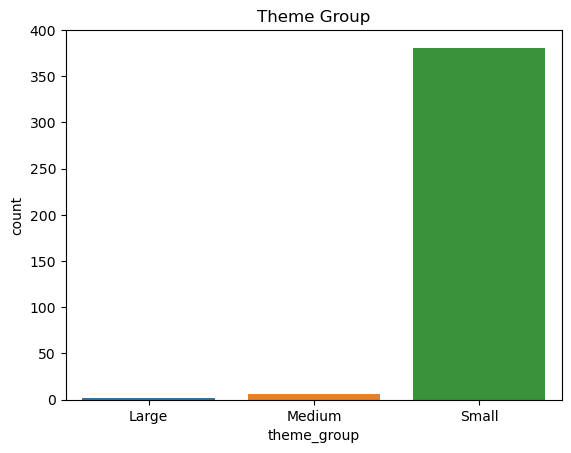

In [12]:
def group_theme(num_parts):
    if num_parts > 150000:
        return "Large"
    elif num_parts > 80000:
        return "Medium"
    else:
        return "Small"
num_parts_per_theme['theme_group'] = num_parts_per_theme['num_parts'].apply(group_theme)

print(num_parts_per_theme)

sns.countplot(num_parts_per_theme, x='theme_group')
plt.title('Theme Group')

plt.show()

#### 2.) What is the total number of parts per year

year
2023    300887
2022    281277
2021    265432
2020    212105
2019    192623
         ...  
1956       295
1954       117
1959        57
1953        50
1950         6
Name: num_parts, Length: 74, dtype: int64


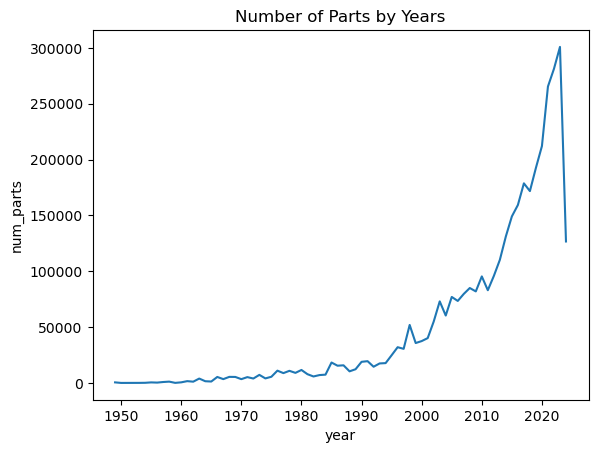

In [13]:
num_parts_by_years = sets_themes_df.groupby('year')['num_parts'].sum().sort_values(ascending = False)
print(num_parts_by_years)
sns.lineplot(num_parts_by_years)
plt.title('Number of Parts by Years')
plt.show()

#### 3.) How many sets where created in each Century in the dataset

In [14]:
def century(year):
    if year > 2000:
        return '21st_Century'
    else:
        return '20th_Century'
sets_themes_df['Century'] = sets_themes_df['year'].apply(century)
sets_themes_df.head()

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,Century
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,Activity Books with LEGO Parts,497.0,21st_Century
1,001-1,Gears,1965,756,43,Samsonite,365.0,20th_Century
2,0011-2,Town Mini-Figures,1979,67,12,Classic Town,50.0,20th_Century
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,Lion Knights,186.0,20th_Century
4,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0,20th_Century


Century
20th_Century     5079
21st_Century    17684
Name: set_num, dtype: int64


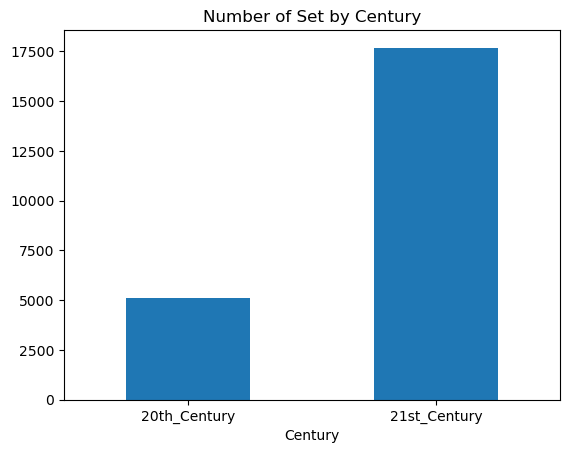

In [15]:
import matplotlib.pyplot as plt
print(sets_themes_df.groupby('Century')['set_num'].count())
sets_themes_df.groupby('Century')['set_num'].count().plot(kind = 'bar')
plt.title('Number of Set by Century')
plt.xticks(rotation = 360)
plt.show()

#### 4.) What percentage of sets ever released in the 21st Century were Trains Themed 

In [16]:
sets_themes_df['theme_name'].replace('Train', "Trains", inplace=True)

In [17]:
sets_themes_df_21st = sets_themes_df[sets_themes_df['Century'] == '21st_Century']
Percentagetrains = len(sets_themes_df_21st[sets_themes_df_21st['theme_name']=='Trains'])/len(sets_themes_df_21st) * 100

In [18]:
def gr_theme_name(theme_name):
    if theme_name != 'Trains':
        return 'Other'
    else:
        return 'Trains'
sets_themes_df_21st.loc[:,'gr_theme_name'] = sets_themes_df_21st['theme_name'].apply(gr_theme_name).copy()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21036\685842909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sets_themes_df_21st.loc[:,'gr_theme_name'] = sets_themes_df_21st['theme_name'].apply(gr_theme_name).copy()


0.38452838724270527


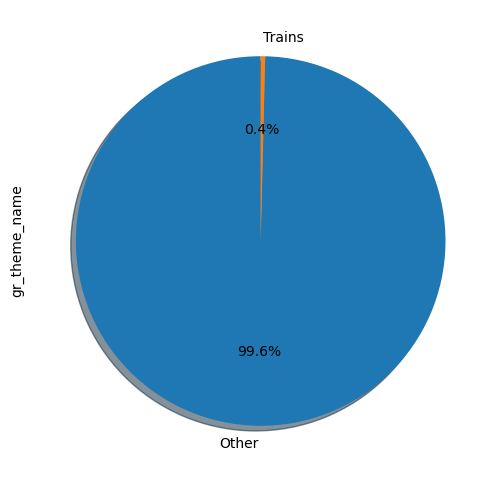

In [19]:
print(Percentagetrains)
plt.figure(figsize=(6,6))
sets_themes_df_21st.groupby('gr_theme_name')['gr_theme_name'].count().plot(kind='pie', startangle=90, autopct='%1.1f%%', shadow=True);

#### 5.) What percentage of sets ever released in the 21st Century were Disney Themed

In [20]:
PercentageDisney = len(sets_themes_df_21st[sets_themes_df_21st['theme_name']=='Disney'])/len(sets_themes_df_21st) * 100

In [21]:
def gr_theme_names(theme_name):
    if theme_name != 'Disney':
        return 'Other'
    else:
        return 'Disney'
sets_themes_df_21st.loc[:,'gr_theme_name'] = sets_themes_df_21st['theme_name'].apply(gr_theme_names).copy()

0.2770866319837141


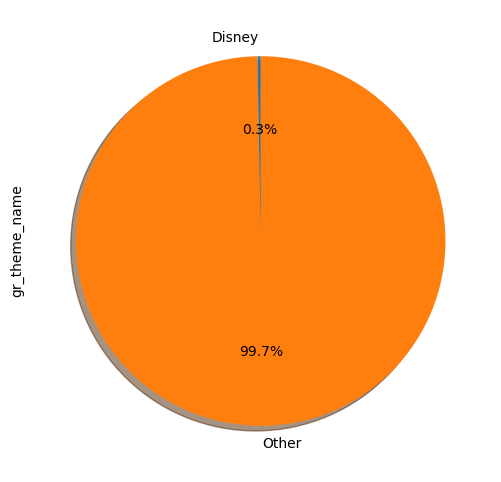

In [22]:
print(PercentageDisney)
plt.figure(figsize=(6,6))
sets_themes_df_21st.groupby('gr_theme_name')['gr_theme_name'].count().plot(kind='pie', startangle=90, autopct='%1.1f%%', shadow=True);

#### 6.) What is the popular theme by year in terms of sets released in the 21st Century

In [23]:
theme_by_year = sets_themes_df_21st.groupby(['year', 'theme_name'])['set_num'].count().sort_values(ascending=False).reset_index()
theme_by_year
#theme_by_year.sort_values('year', ascending=False) 

,year,theme_name,set_num
0,2021,Gear,156
1,2014,Technic,118
2,2015,Star Wars,69
3,2018,Star Wars,69
4,2017,Star Wars,64
...,...,...,...
1922,2015,Tabletop Games and Puzzles,1
1923,2015,Thanksgiving,1
1924,2015,Valentine,1
1925,2015,WeDo,1


In [24]:
sets_per_year_theme = sets_themes_df_21st.groupby([sets_themes_df_21st['year'], 'theme_name']).count().reset_index()
sets_per_year_theme
# Find the most popular theme for each year
popular_theme_per_year = sets_per_year_theme[['year', 'theme_name', 'set_num']].loc[sets_per_year_theme.groupby('year')['set_num'].idxmax()]
popular_theme_per_year

,year,theme_name,set_num
7,2001,Bionicle,45
109,2002,Technic,64
123,2003,Bionicle,63
188,2004,Bionicle,51
248,2005,Bionicle,38
314,2006,Bionicle,50
403,2007,Key Chain,36
445,2008,Bionicle,39
568,2009,Star Wars,35
616,2010,Key Chain,44


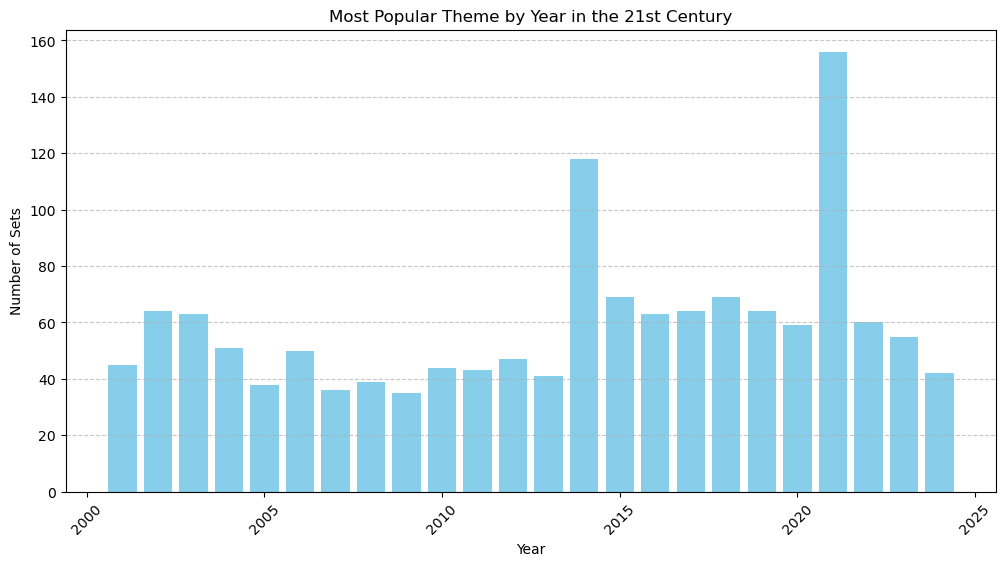

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(popular_theme_per_year['year'], popular_theme_per_year['set_num'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Most Popular Theme by Year in the 21st Century')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

#### 7.) What is the most produced color of lego ever in terms of quantity of parts?

In [26]:
inventory_parts_df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Project\Lego\Dataset\inventory_parts.csv")
colors_df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Project\Lego\Dataset\colors.csv")

In [27]:
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,https://cdn.rebrickable.com/media/parts/photos...
4,1,upn0350,25,1,f,NaN


In [28]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [29]:
color_inventory_part = pd.merge(inventory_parts_df, colors_df, left_on='color_id', right_on='id', how='left')
color_inventory_part.rename(columns={'name': 'color_name'}, inplace=True)
top_10_color = color_inventory_part.groupby('color_name')['quantity'].sum().sort_values(ascending=False).head(10)

''

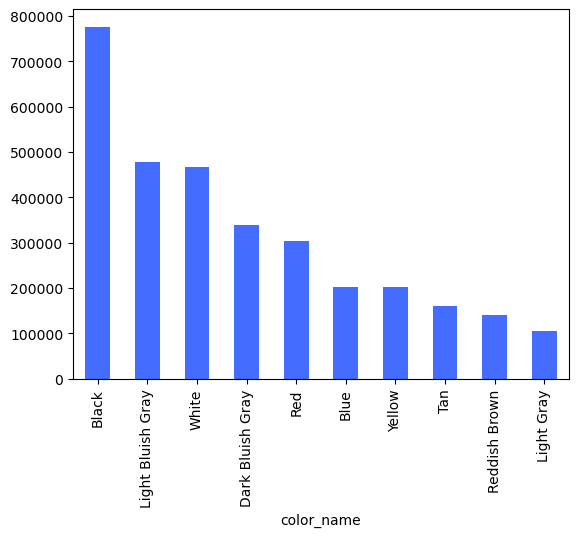

In [30]:
print(top_10_color) 
top_10_color.plot(kind='bar', color='#446cff')
;